# Hybrid Community Analysis
This notebook analyzes hybrid community assignments and patient characteristics.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Define paths
base_path = "../data/full"
# hybrid_comm_path = os.path.join(base_path, "slpa", "community_assignments.csv")
# hybrid_comm_path = os.path.join(base_path, "leiden", "level_0_community_assignments.csv")
# hybrid_comm_path = os.path.join(base_path, "hybrid", "community_assignments.csv")
# hybrid_comm_path = os.path.join(base_path, "w_slpa", "community_assignments.csv")
hybrid_comm_path = os.path.join(base_path, "w_slpa", "community_assignments.csv")
patient_df_path = os.path.join("../../data/thesis/cll_broad_2022_clinical_data_thesis.csv")

In [48]:
# Load data
community_df = pd.read_csv(hybrid_comm_path)
patient_df = pd.read_csv(patient_df_path)

In [49]:
# Merge community assignments with patient data
merged_df = pd.merge(community_df, patient_df, on="patientId", how="left")

In [50]:
# Count how many communities each patient belongs to
community_counts = merged_df.groupby("patientId")["communityId"].nunique().reset_index()
community_counts.columns = ["patientId", "num_communities"]
multi_community_patients = community_counts[community_counts["num_communities"] > 1]

In [51]:
# Summary statistics
total_patients = community_counts.shape[0]
num_multi_community = multi_community_patients.shape[0]
print(f"Total patients: {total_patients}")
print(f"Patients in multiple communities: {num_multi_community} ({num_multi_community / total_patients:.2%})")

Total patients: 1008
Patients in multiple communities: 54 (5.36%)


In [52]:
# Add community count to merged_df
merged_df = pd.merge(merged_df, community_counts, on="patientId", how="left")

In [53]:
# Analyze distribution of CLL_EPITYPE across communities
epitype_distribution = merged_df.groupby(["communityId", "CLL_EPITYPE"]).size().unstack(fill_value=0)
epitype_distribution_percent = epitype_distribution.div(epitype_distribution.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

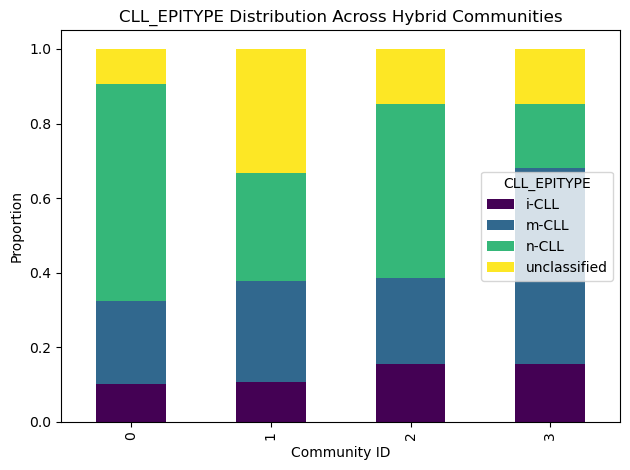

In [54]:
# Plot CLL_EPITYPE distribution
plt.figure(figsize=(12, 6))
epitype_distribution_percent.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("CLL_EPITYPE Distribution Across Hybrid Communities")
plt.ylabel("Proportion")
plt.xlabel("Community ID")
plt.legend(title="CLL_EPITYPE")
plt.tight_layout()
# plt.savefig("cll_epitype_distribution.png")
plt.show()
plt.close()

In [55]:
# Analyze distribution of TUMOR_MOLECULAR_SUBTYPE across communities
subtype_distribution = merged_df.groupby(["communityId", "TUMOR_MOLECULAR_SUBTYPE"]).size().unstack(fill_value=0)
subtype_distribution_percent = subtype_distribution.div(subtype_distribution.sum(axis=1), axis=0)

<Figure size 1200x600 with 0 Axes>

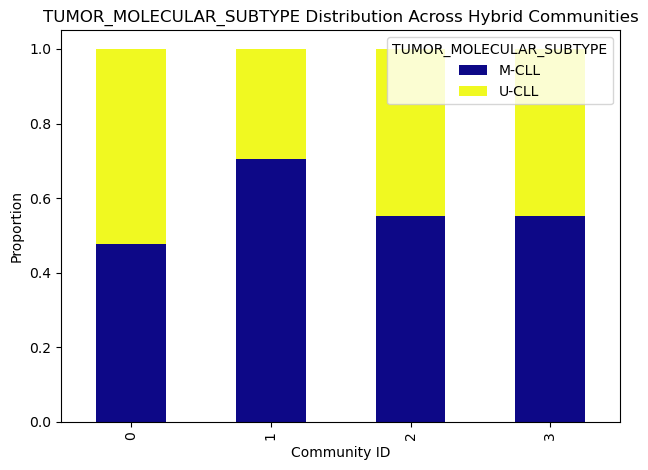

In [56]:
# Plot TUMOR_MOLECULAR_SUBTYPE distribution
plt.figure(figsize=(12, 6))
subtype_distribution_percent.plot(kind="bar", stacked=True, colormap="plasma")
plt.title("TUMOR_MOLECULAR_SUBTYPE Distribution Across Hybrid Communities")
plt.ylabel("Proportion")
plt.xlabel("Community ID")
plt.legend(title="TUMOR_MOLECULAR_SUBTYPE")
plt.tight_layout()
# plt.savefig("tumor_subtype_distribution.png")
plt.show()
plt.close()

In [57]:
# Additional characteristics to analyze
characteristics = ["SEX", "IGHV_MUTATION_STATUS", "IGLV3_21_R110", "U1_STATUS", "PRIOR_TREATMENT_CATEGORY"]

<Figure size 1200x600 with 0 Axes>

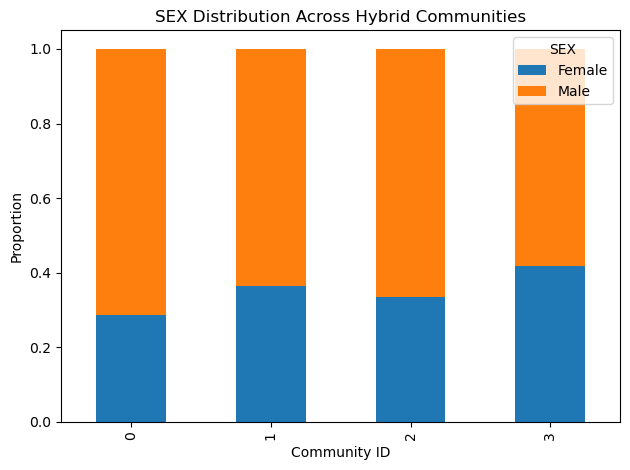

<Figure size 1200x600 with 0 Axes>

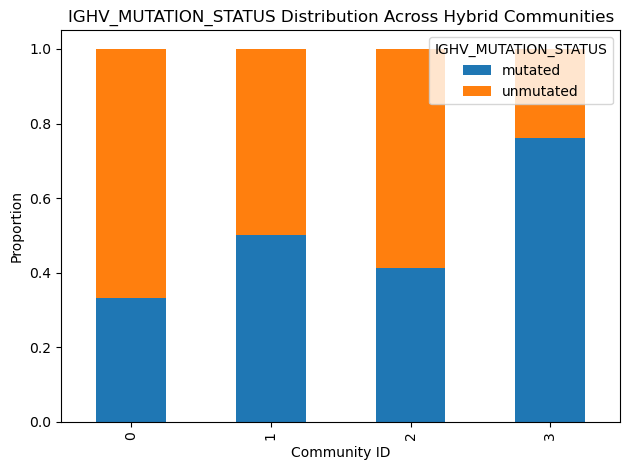

<Figure size 1200x600 with 0 Axes>

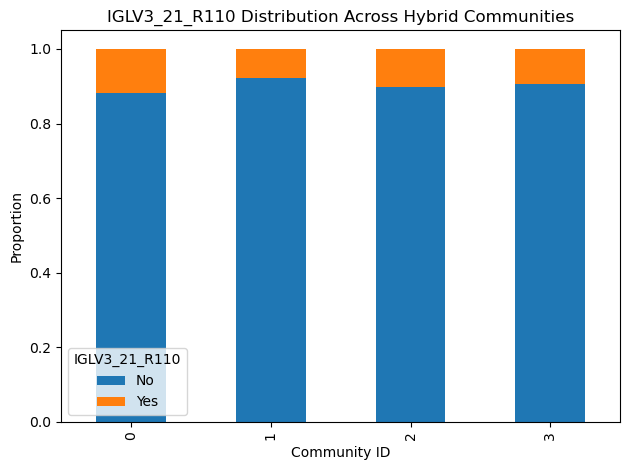

<Figure size 1200x600 with 0 Axes>

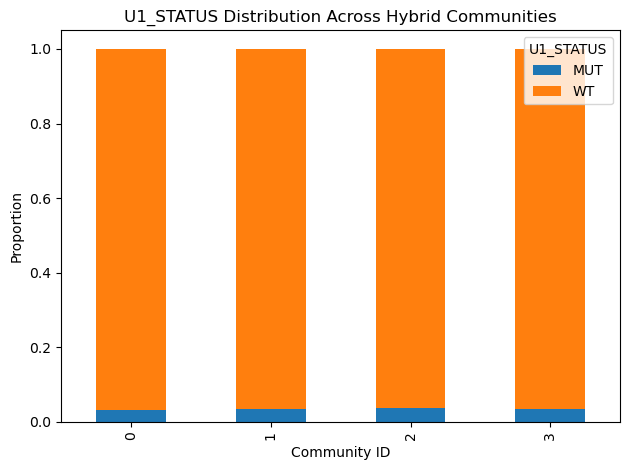

<Figure size 1200x600 with 0 Axes>

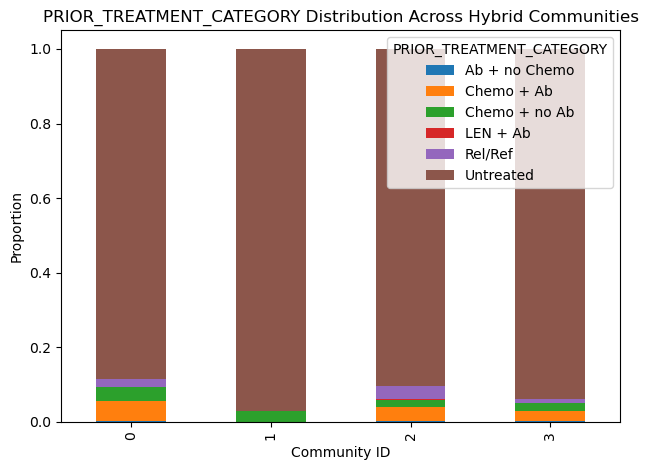

In [58]:
# Plot distribution of each characteristic across communities
for char in characteristics:
    dist = merged_df.groupby(["communityId", char]).size().unstack(fill_value=0)
    dist_percent = dist.div(dist.sum(axis=1), axis=0)
    plt.figure(figsize=(12, 6))
    dist_percent.plot(kind="bar", stacked=True)
    plt.title(f"{char} Distribution Across Hybrid Communities")
    plt.ylabel("Proportion")
    plt.xlabel("Community ID")
    plt.legend(title=char)
    plt.tight_layout()
    # plt.savefig(f"{char.lower()}_distribution.png")
    plt.show()
    plt.close()

In [59]:
# Save summary statistics
summary_stats = {
    "total_patients": total_patients,
    "multi_community_patients": num_multi_community,
    "percent_multi_community": round(num_multi_community / total_patients * 100, 2)
}
summary_df = pd.DataFrame([summary_stats])
# summary_df.to_csv("hybrid_community_summary.csv", index=False)
summary_df

,total_patients,multi_community_patients,percent_multi_community
0,1008,54,5.36


In [60]:
print("Hybrid community analysis completed. Summary and plots saved.")

Hybrid community analysis completed. Summary and plots saved.
